In [2]:
from sklearn.datasets import load_digits

In [4]:
d = load_digits()
d.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
print(d['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [20]:
d.data[0] # one image in array form

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
d.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

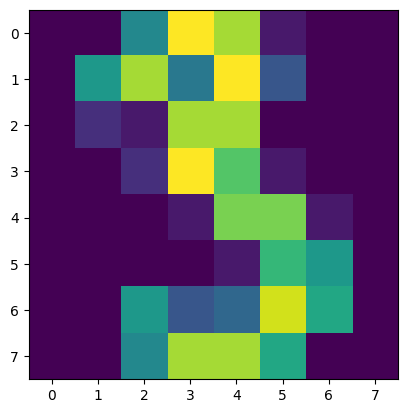

In [9]:
# display imges
import matplotlib.pyplot as plt
plt.imshow(d.images[3])

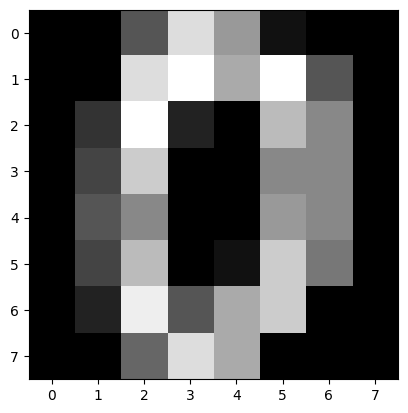

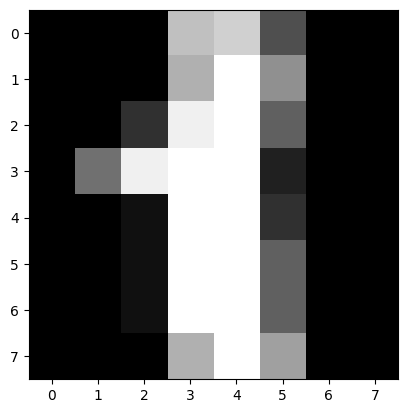

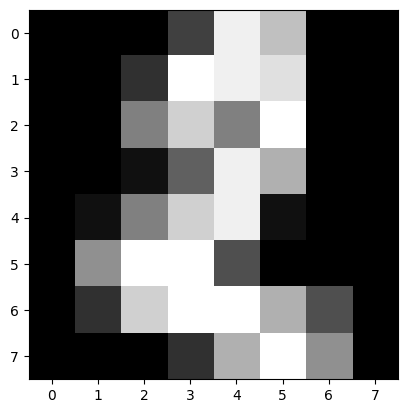

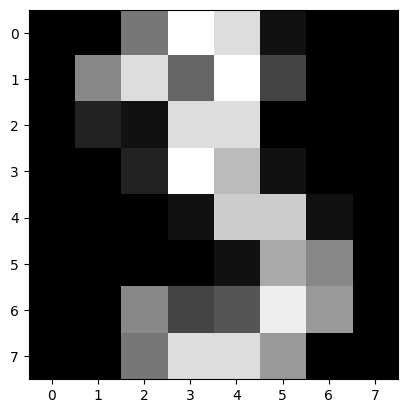

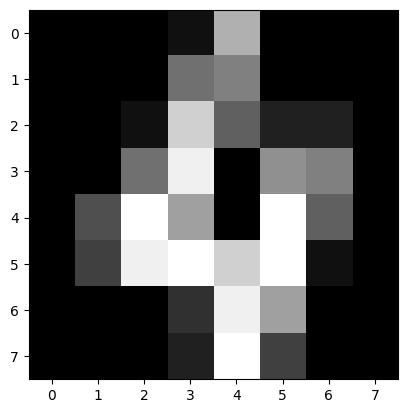

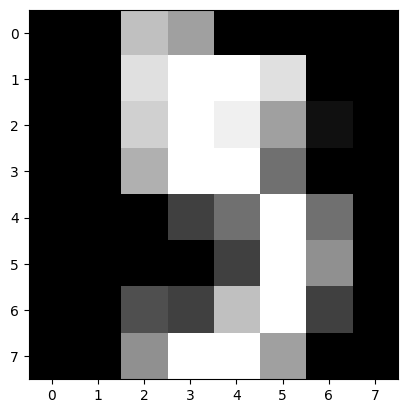

In [10]:
for i in range(6):
  plt.imshow(d.images[i])
  plt.gray()
  plt.show()

In [21]:
# lets form a data
import pandas as pd
df = pd.DataFrame(d.data,columns=d.feature_names)

In [12]:
# check  target
d.target

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
# check unique target
import numpy as np
np.unique(d.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
len(d.target)

1797

In [22]:
df['output'] = d.target
df.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,output
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1


In [23]:
# split data into training and testing
from sklearn.model_selection import train_test_split

In [24]:
x = df.drop(columns = 'output')
x[:2]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [27]:
y = df.output
y[:2]

0    0
1    1
Name: output, dtype: int64

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [32]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
bnb.score(x_train,y_train)*100

86.49965205288797

In [34]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train)*100

90.6054279749478

In [35]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100

87.68267223382045

In [36]:
# from above result we are going to continue with MultinomialNB

In [37]:
# test phase
y_pred = mnb.predict(x_test)
y_pred[:5]

array([7, 2, 4, 6, 6])

In [38]:
y_test[:5]

633     5
1437    2
988     4
362     6
1035    6
Name: output, dtype: int64

## performance matrics

In [46]:
from sklearn.metrics import confusion_matrix,classification_report

In [40]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[28,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 29,  0,  0,  0,  0,  0,  0,  4,  1],
       [ 0,  3, 38,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  1, 26,  0,  1,  0,  1,  1,  3],
       [ 0,  0,  0,  0, 32,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  1,  1,  4],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  2,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 26,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  2,  2, 27]])

Text(70.72222222222221, 0.5, 'Actual')

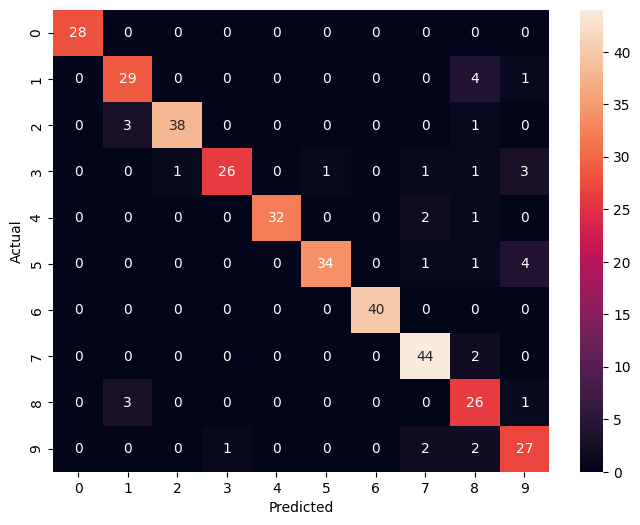

In [41]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [42]:
sum(y_pred==9)
# columswise predicted data
# rowwise actual data

36

In [43]:
len(y_test)

360

In [44]:
sum(y_test == 4)

35

In [47]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.83      0.85      0.84        34
           2       0.97      0.90      0.94        42
           3       0.96      0.79      0.87        33
           4       1.00      0.91      0.96        35
           5       0.97      0.85      0.91        40
           6       1.00      1.00      1.00        40
           7       0.88      0.96      0.92        46
           8       0.68      0.87      0.76        30
           9       0.75      0.84      0.79        32

    accuracy                           0.90       360
   macro avg       0.91      0.90      0.90       360
weighted avg       0.91      0.90      0.90       360



In [48]:
# Assignment: Import iris sdataset and apply naive Bayes

In [49]:
from sklearn.datasets import load_iris

In [52]:
i = load_iris()
df1 = pd.DataFrame(i.data,columns= i.feature_names)

In [53]:
i.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [54]:
np.unique(i.target)

array([0, 1, 2])

In [55]:
len(i.target)

150

In [56]:
df1['output'] = i.target
df1.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),output
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


## spliting of data into input and output

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x = df1.drop(columns='output')
x[:2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [59]:
y = df1.output
y[:2]

0    0
1    0
Name: output, dtype: int64

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [61]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
bnb.score(x_train,y_train)*100

34.166666666666664

In [62]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train)*100

93.33333333333333

In [63]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100

96.66666666666667

from the above result we are going to continue with GaussianNB as it has the highest score.

In [66]:
# test phase
y_pred = gnb.predict(x_test)
y_pred[:5]

array([0, 2, 2, 1, 1])

In [67]:
y_test[:5]

0      0
140    2
144    2
57     1
50     1
Name: output, dtype: int64

In [68]:
# Performance report
from sklearn.metrics import confusion_matrix,classification_report

In [70]:
cm1 = confusion_matrix(y_test,y_pred)
cm1

array([[10,  0,  0],
       [ 0,  9,  2],
       [ 0,  0,  9]])

Text(70.72222222222221, 0.5, 'Actual')

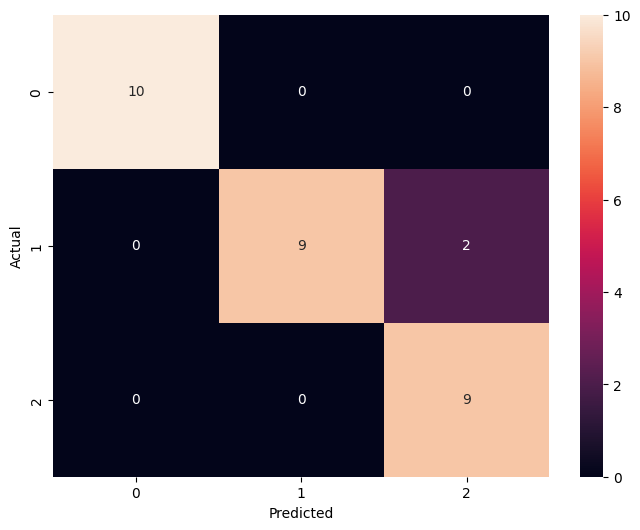

In [71]:
plt.figure(figsize=(8,6))
sns.heatmap(cm1,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [72]:
# columns wise predicted data
sum(y_pred == 2)

11

In [74]:
# rowwise actual data
sum(y_test == 0)

10

In [75]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.82      0.90        11
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [76]:
sum(y_test == 2)

9

In [78]:
sum(y_test == 0)

10